# 1. Librerías necesarias

In [1]:
import tweepy
import csv
import io
from collections import Counter

import pandas as pd
from scipy.misc import imread
import matplotlib.pyplot as plt

from wordcloud import WordCloud, ImageColorGenerator

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords as sw
import tinysegmenter
from nltk.tokenize import RegexpTokenizer

from analytics import proc_freq

# -*- coding: utf-8 -*- 


# 2. Lectura de texto y creacion de palabras

In [81]:
text_jp=io.open('/Users/jose.gustavo/data/XJAPANLyrics.txt','r',encoding='utf8').read().lower().replace('\n',' ')
text_en=io.open('/Users/jose.gustavo/data/XJAPANLyrics_EN.txt','r',encoding='utf8').read().lower().replace('\n',' ')
segmenter = tinysegmenter.TinySegmenter()
palabras_jp=segmenter.tokenize(text_jp)
palabras_jp=' '.join(palabras_jp)
palabras_en=text_en

# 3. Palabras de escape

In [104]:
stop_words_jp=pd.read_table('/Users/jose.gustavo/data/japanese_stopwrds.txt')['word'].tolist()
stop_words_en=sw.words('english')

stop_words_jp.extend([u'だけ',u'この',u'おまえ',u'ない',u'もう',u'まで',u'しめ',u'られ'])
stop_words_en.extend([u"i'm",u"can't",u'oh',u'ah',"i'll","get","i've","don't"])

sw_set_jp=set()
for wrd in stop_words_jp:
    sw_set_jp.add(wrd.strip())
    
sw_set_en=set()
for wrd in stop_words_en:
    sw_set_en.add(wrd)

# ４。日本語

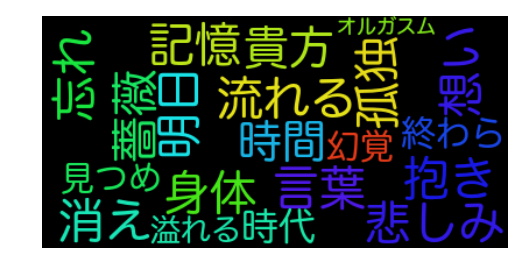

In [99]:
fpath_jp='/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc'
wc = WordCloud(max_font_size=40,
               max_words=20,
               font_path=fpath_jp,
               background_color='Black',
              stopwords=sw_set_jp).generate(palabras_jp)
plt.imshow(wc)
plt.axis("off")
plt.show()

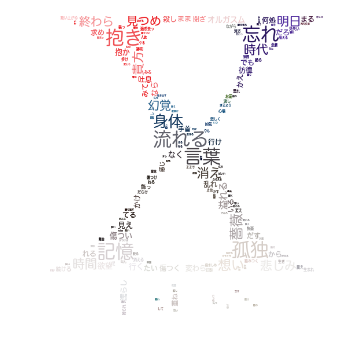

In [100]:
imagen=imread('/Users/jose.gustavo/Documents/xjp-logo-footer.png')
colores_imagen = ImageColorGenerator(imagen)

wc_jp= WordCloud(mask=imagen,
                      max_font_size=100,
                      max_words=200,
                      font_path=fpath_jp,
                      background_color='white',
                      stopwords=sw_set_jp,
                      color_func=colores_imagen
                     ).generate(palabras_jp)

plt.imshow(wc_jp)
plt.axis("off")
plt.show()

# 5. English 

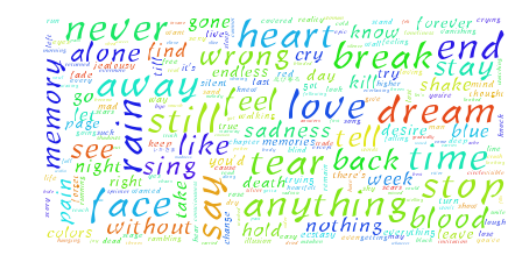

In [112]:
fpath_en='/Library/Fonts/Libian.ttc'
wc = WordCloud(max_font_size=40,
               max_words=500,
               font_path=fpath_en,
               background_color='white',
              stopwords=sw_set_en).generate(palabras_en)
plt.imshow(wc)
plt.axis("off")
plt.show()

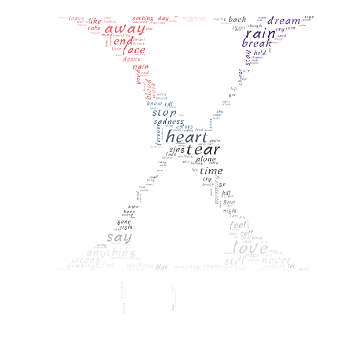

In [111]:
imagen=imread('/Users/jose.gustavo/Documents/xjp-logo-footer.png')
colores_imagen = ImageColorGenerator(imagen)

wc_en= WordCloud(mask=imagen,
                      max_font_size=100,
                      max_words=200,
                      font_path=fpath_en,
                      background_color='white',
                      stopwords=sw_set_en,
                      color_func=colores_imagen
                     ).generate(palabras_en)

plt.imshow(wc_en)
plt.axis("off")
plt.show()